### Scatter plot for evaluating FLC estimation performance

* data in  `FLCI_scatter_plot_data` generated in `FLCI.ipynb` and `satellite_image.ipynb`

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_dir = 'FLCI_scatter_plot_data/'
flc_est_file = 'btd_georgesbank_20240620.nc'
sat_btd_file = 'satellite_2024_06_20_06Z.nc'

flc_est = xr.open_dataset(data_dir+flc_est_file)
sat_btd = xr.open_dataset(data_dir+sat_btd_file)

In [3]:
sat_btd

<xarray.Dataset> Size: 7MB
Dimensions:                        (y: 491, x: 720)
Coordinates:
    y_image                        float32 4B ...
    x_image                        float32 4B ...
  * y                              (y) float32 2kB 0.1204 0.1203 ... 0.09293
  * x                              (x) float32 3kB 0.004116 0.004172 ... 0.04438
    lat                            (y, x) float64 3MB ...
    lon                            (y, x) float64 3MB ...
Data variables:
    __xarray_dataarray_variable__  (y, x) float32 1MB ...

*Current issue: This creates a "diagonal stripe" of lat/lon pairs, where I want the full colocated rectangle.*

In [4]:

lat2d = sat_btd['lat'].values  # shape (y, x)
lon2d = sat_btd['lon'].values  # shape (y, x)

# Flatten the 2D grid to 1D for searching
lat_flat = lat2d.ravel()
lon_flat = lon2d.ravel()

# Stack the indices for later use
yx_pairs = np.indices(lat2d.shape).reshape(2, -1).T  # shape (N, 2)

# Example: lat/lon pairs from ds1
lat_vals = flc_est['latitude'].values
lon_vals = flc_est['longitude'].values-360

results = []

for lat, lon in zip(lat_vals.ravel(), lon_vals.ravel()):
    # Compute distance to every point in ds2
    dists = np.sqrt((lat_flat - lat)**2 + (lon_flat - lon)**2)
    min_idx = np.argmin(dists)
    y_idx, x_idx = yx_pairs[min_idx]

    # Extract value at the nearest point
    value = sat_btd['__xarray_dataarray_variable__'].isel(y=y_idx, x=x_idx).values.item()

    results.append({'lat': lat, 'lon': lon, 'nearest_value': value})

# Convert to DataFrame for easy viewing
df_results = pd.DataFrame(results)


In [5]:
df_results

,lat,lon,nearest_value
0,46.00,-73.00,-9.551422
1,45.75,-72.75,-9.952667
2,45.50,-72.50,-4.704041
3,45.25,-72.25,-10.841492
4,45.00,-72.00,-16.039520
5,44.75,-71.75,-15.800323
6,44.50,-71.50,-18.528000
7,44.25,-71.25,-14.242493
8,44.00,-71.00,-2.599457
9,43.75,-70.75,-3.434418


In [6]:
print(f'Shape of filtered sat IR BTD: {np.shape(df_results.nearest_value)}, shape of BTD estimation: {np.shape(flc_est.BTD.values)}')

Shape of filtered sat IR BTD: (53,), shape of BTD estimation: (53, 65)


ValueError: x and y must be the same size

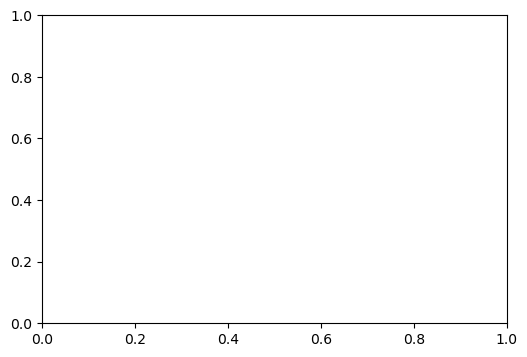

In [7]:
# Create the scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(df_results.nearest_value, flc_est.BTD.values, color='blue', marker='o')

# Add titles and labels
plt.title("Basic Scatter Plot")
plt.xlabel("X Axis")
plt.ylabel("Y Axis")

# Show grid
plt.grid(True)

# Show the plot
plt.show()